<center>
    <h1> 
        Transformando uma Imagem em Escala de Cinza
    </h1>
</center>
    <div style="text-align: right;"><h3>
        Carlos Eduardo Cassimiro da Silva
    </h3></div>

<center>
    <h4>Experimentação da conversão de cores de uma imagem em escala cinza baseado em uma vídeo aula do canal Programação Dinâmica</h4>
    Link: https://www.youtube.com/watch?v=_3VcRHwZpPU&t=710s
</center>

<h4>Roteiro</h4>
Módulos utilizados <br>
Imagem Original <br>
1. Transformação de Imagem em Escala Cinza <br>
1.1 Utilizando o OpenCV <br>
1.2 Utilizando o skimage <br>
1.3 Utilizando o PIL
1.4 Utilizando uma Função Criada <br>

##### Módulos utilizados

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage import color
from PIL import Image, ImageOps

#### Imagem Original

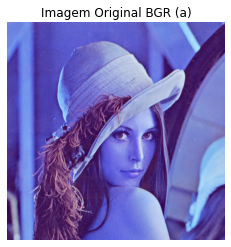

In [2]:
image = cv2.imread('imagens_originais/lenna.png')
plt.title('Imagem Original BGR (a)')
plt.axis('off')
plt.imshow(image);

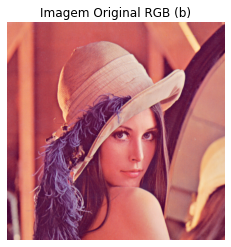

In [3]:
image_RGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.title('Imagem Original RGB (b)')
plt.axis('off')
plt.imshow(image_RGB);

## 1. Transformação de Imagem em Escala Cinza
### 1.1 Utilizando o OpenCV

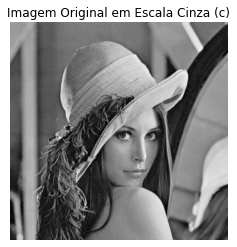

In [4]:
image_gray = cv2.cvtColor(image_RGB, cv2.COLOR_RGB2GRAY)
plt.title('Imagem Original em Escala Cinza (c)')
plt.axis('off')
plt.imshow(image_gray, cmap='gray');

Podemos notar que o OpenCV muda a forma do vetor:

In [5]:
# Original
image[0]

array([[125, 137, 226],
       [125, 137, 226],
       [133, 137, 223],
       ...,
       [122, 148, 230],
       [110, 130, 221],
       [ 90,  99, 200]], dtype=uint8)

In [6]:
# Escala cinza com o OpenCV
image_gray

array([[162, 162, 162, ..., 170, 155, 128],
       [162, 162, 162, ..., 170, 155, 128],
       [162, 162, 162, ..., 170, 155, 128],
       ...,
       [ 43,  43,  50, ..., 104, 100,  98],
       [ 44,  44,  55, ..., 104, 105, 108],
       [ 44,  44,  55, ..., 104, 105, 108]], dtype=uint8)

### 1.2 Utilizando o skimage

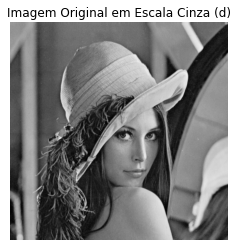

In [7]:
image_gray = color.rgb2gray(image_RGB)
plt.title('Imagem Original em Escala Cinza (d)')
plt.axis('off')
plt.imshow(image_gray, cmap='gray');

In [8]:
# Escala cinza com o OpenCV
image_gray

array([[0.60802863, 0.60802863, 0.60779059, ..., 0.64137412, 0.57998235,
        0.46985725],
       [0.60802863, 0.60802863, 0.60779059, ..., 0.64137412, 0.57998235,
        0.46985725],
       [0.60802863, 0.60802863, 0.60779059, ..., 0.64137412, 0.57998235,
        0.46985725],
       ...,
       [0.13746353, 0.13746353, 0.16881412, ..., 0.37271804, 0.35559529,
        0.34377725],
       [0.14617059, 0.14617059, 0.18730588, ..., 0.36788784, 0.37292549,
        0.38467529],
       [0.14617059, 0.14617059, 0.18730588, ..., 0.36788784, 0.37292549,
        0.38467529]])

### 1.3 Utilizando o PIL

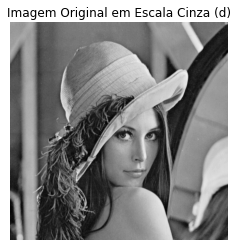

In [9]:
image2 = Image.open('imagens_originais/lenna.png')
image_gray = ImageOps.grayscale(image2)
plt.title('Imagem Original em Escala Cinza (d)')
plt.axis('off')
plt.imshow(image_gray, cmap='gray');

### 1.4 Utilizando uma Função Criada

Uma imagem em escala cinza nada mais é que uma imagem colorida onde o valor de cada pixel é a média dos valores RGB do referido pixel. Entretanto, a composição das cores em RGB de uma imagem tem pesos diferentes, então precisamos realizar uma média ponderada entre esses valores. <br>
Pesos aproximados: red=0.2989  |  green=0.5870  |  blue=0.1140

In [10]:
# Espera-se uma imagem np.array e em RGB (não BGR)
def colored_to_gray(image):
    rows, cols, _  = image.shape
    image_gray = image*0 # multipliquei por 0 para não precisar usar o deepcopy
    for i in range(rows):
        for j in range(cols):
            pixel = image[i][j]
            gray_pixel = pixel[0]*0.2989 + pixel[1]*0.5870 + pixel[2]*0.1140
            image_gray[i][j] = [gray_pixel, gray_pixel, gray_pixel]
    return image_gray

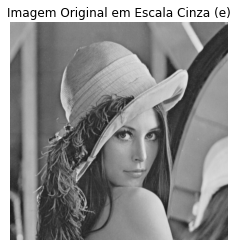

In [11]:
image_mygray = colored_to_gray(image_RGB)
plt.title('Imagem Original em Escala Cinza (e)')
plt.axis('off')
plt.imshow(image_mygray);